In [1]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

In [2]:
y, sr = librosa.load("audio.mp3")

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
y

array([ 4.0855261e-06, -8.5085439e-06, -4.4997973e-06, ...,
       -2.0325806e-06, -1.2172859e-06,  0.0000000e+00], dtype=float32)

In [4]:
sr

22050

In [5]:
onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr, hop_length = 512)

In [6]:
tempo

95.703125

In [7]:
beats

array([  19,   46,   74,  101,  128,  155,  178,  202,  226,  250,  277,
        304,  332,  359,  386,  414,  441,  468,  495,  522,  550,  577,
        604,  631,  658,  686,  713,  740,  767,  794,  822,  849,  876,
        904,  931,  958,  985, 1012, 1039, 1066, 1094, 1121, 1148, 1175,
       1202, 1230, 1257, 1284])

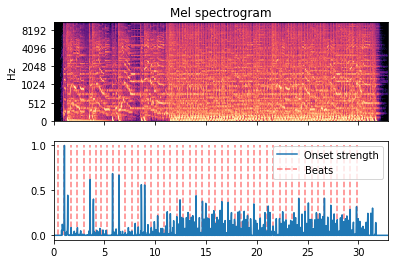

In [8]:
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])

ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()

plt.show()

In [67]:
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr,hop_length=512)

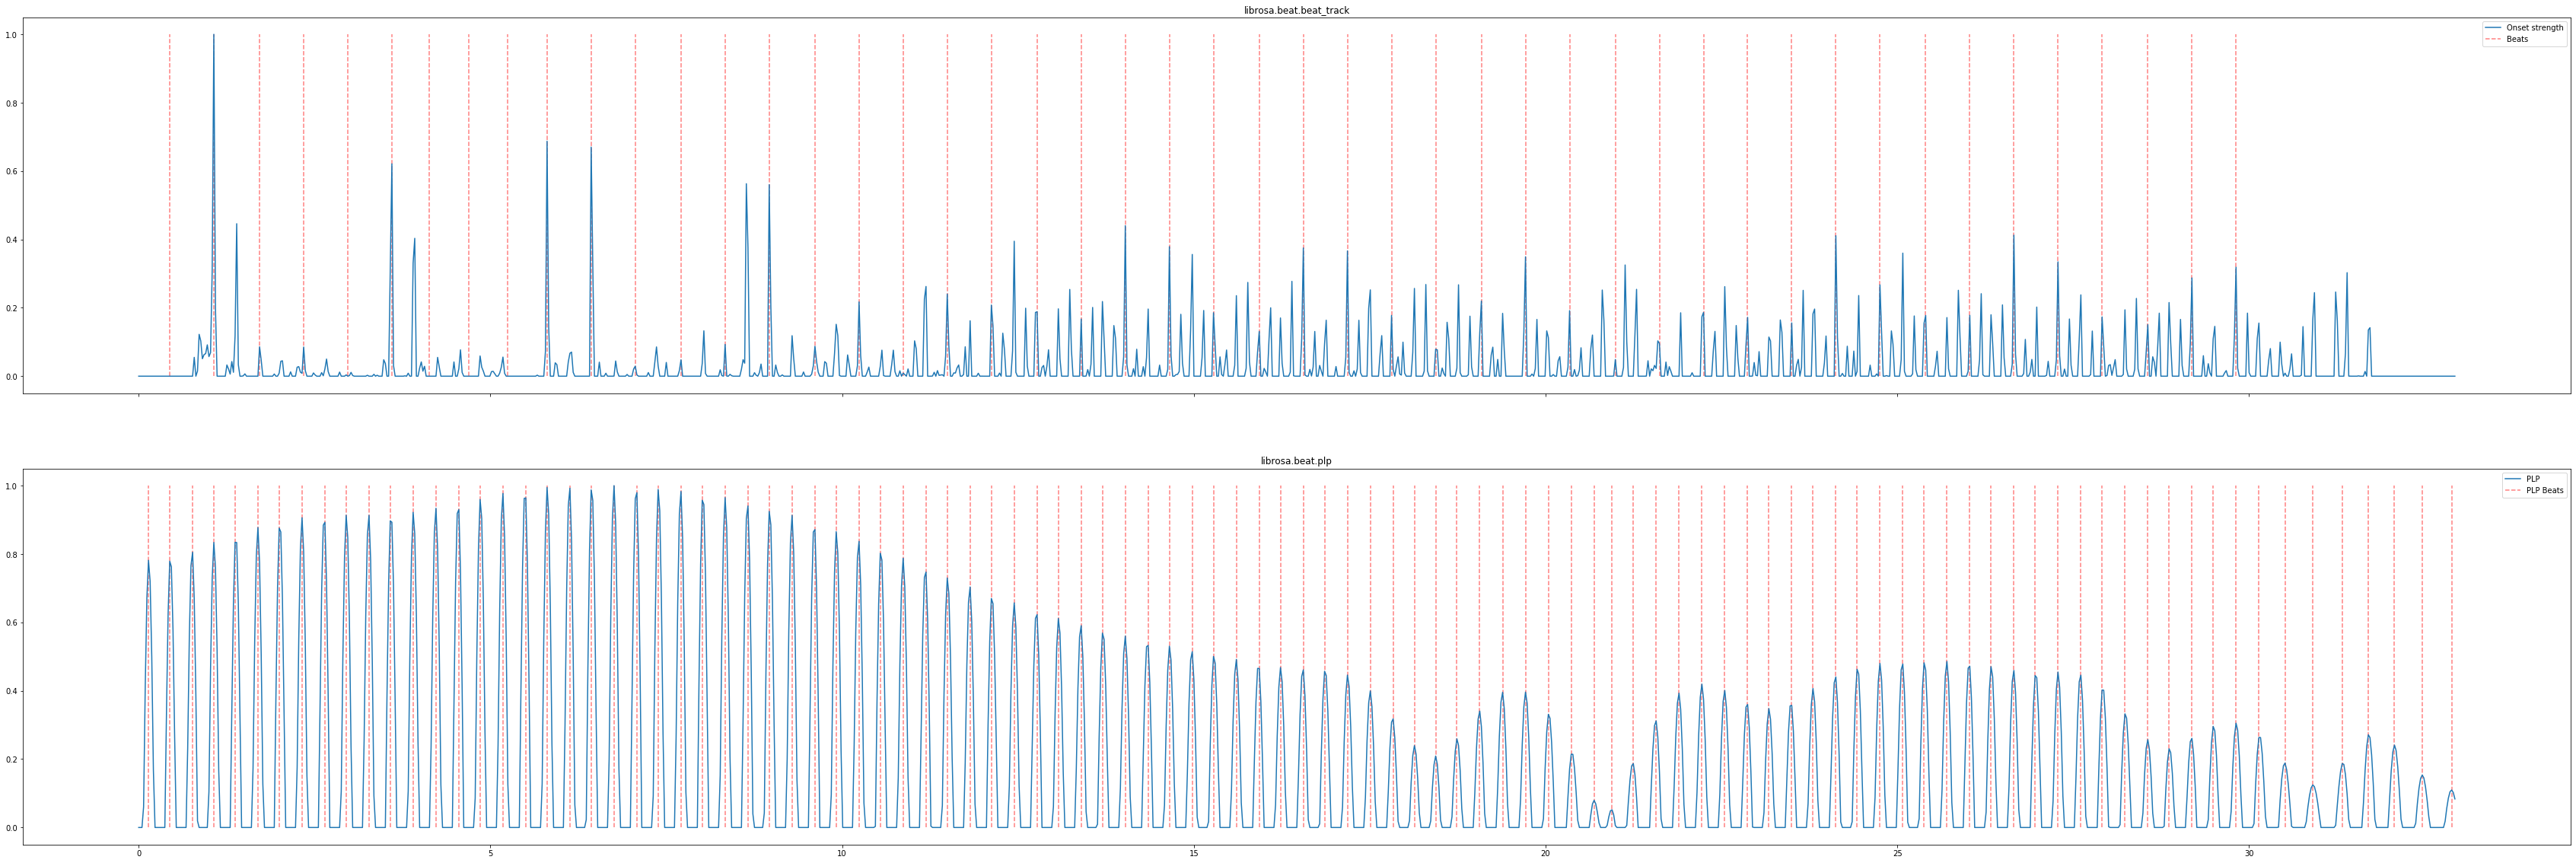

In [68]:
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(60,20))
times = librosa.times_like(onset_env, sr=sr)
ax[0].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[0].legend()
ax[0].set(title='librosa.beat.beat_track')
ax[0].label_outer()
# Limit the plot to a 15-second window
times = librosa.times_like(pulse, sr=sr)
ax[1].plot(times, librosa.util.normalize(pulse),
         label='PLP')
ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='PLP Beats')
ax[1].legend()
ax[1].set(title='librosa.beat.plp')
ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())

In [11]:
beats_plp

array([   6,   19,   33,   46,   59,   73,   86,  100,  114,  127,  141,
        154,  168,  182,  196,  209,  223,  237,  250,  264,  277,  291,
        305,  318,  332,  345,  359,  373,  386,  400,  414,  427,  441,
        454,  468,  482,  495,  509,  522,  536,  550,  563,  577,  590,
        604,  618,  631,  645,  658,  672,  686,  699,  713,  726,  740,
        754,  768,  781,  794,  807,  821,  835,  849,  863,  877,  891,
        902,  915,  929,  943,  957,  971,  985,  998, 1012, 1025, 1039,
       1052, 1066, 1080, 1093, 1107, 1121, 1134, 1148, 1161, 1175, 1189,
       1202, 1216, 1230, 1243, 1257, 1270, 1284, 1298, 1314, 1331, 1349,
       1365, 1381, 1398, 1416], dtype=int64)

In [12]:
len(y)/512

1418.091796875

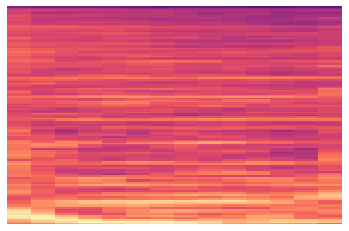

In [13]:
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='frames', hop_length=hop_length)

plt.axis('off')

plt.xlim(46,59)
plt.savefig('lol1.png', bbox_inches='tight', pad_inches=0)
plt.xlim(59,73)
plt.savefig('lol2.png', bbox_inches='tight', pad_inches=0)

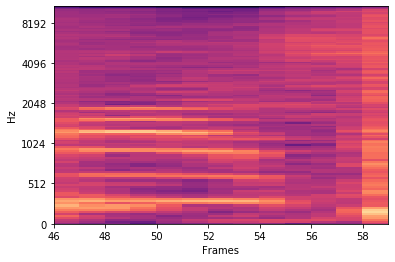

In [14]:
hop_length2=512

M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length2)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='frames', hop_length=hop_length2)

plt.xlim(beats_plp[3]*hop_length/hop_length2,beats_plp[4]*hop_length/hop_length2)
plt.show()

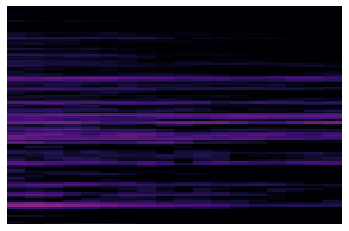

In [15]:
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length2)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='frames', hop_length=hop_length2)

plt.axis('off')

idx=1
for i in range(len(beats_plp)-1):
    plt.xlim(beats_plp[i]*hop_length/hop_length2,beats_plp[i+1]*hop_length/hop_length2)
    plt.savefig('hmm\lol'+str(idx)+'.png', bbox_inches='tight', pad_inches=0)
    idx+=1

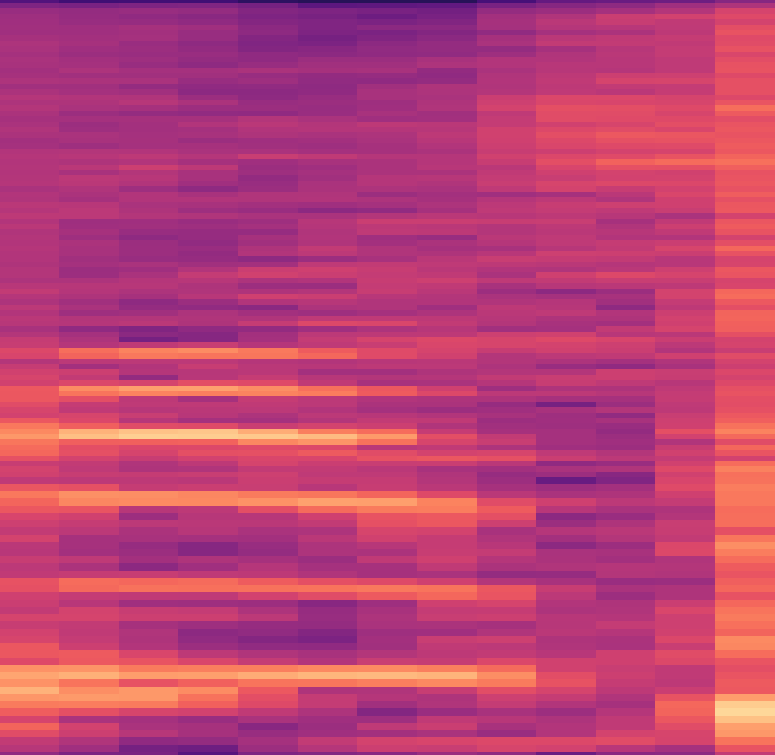

In [42]:
plt.figure(figsize=(1000,1000),dpi=1)

M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length2)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='frames', hop_length=hop_length2)

plt.axis('off')

plt.xlim(beats_plp[3]*hop_length/hop_length2,beats_plp[4]*hop_length/hop_length2)
plt.savefig('test.png', bbox_inches='tight', pad_inches=0)

In [43]:
beats

array([  19,   46,   74,  101,  128,  155,  178,  202,  226,  250,  277,
        304,  332,  359,  386,  414,  441,  468,  495,  522,  550,  577,
        604,  631,  658,  686,  713,  740,  767,  794,  822,  849,  876,
        904,  931,  958,  985, 1012, 1039, 1066, 1094, 1121, 1148, 1175,
       1202, 1230, 1257, 1284])

In [45]:
times

array([0.00000000e+00, 2.32199546e-02, 4.64399093e-02, ...,
       3.28794558e+01, 3.29026757e+01, 3.29258957e+01])

In [46]:
times[beats]

array([ 0.44117914,  1.06811791,  1.71827664,  2.34521542,  2.9721542 ,
        3.59909297,  4.13315193,  4.69043084,  5.24770975,  5.80498866,
        6.43192744,  7.05886621,  7.70902494,  8.33596372,  8.96290249,
        9.61306122, 10.24      , 10.86693878, 11.49387755, 12.12081633,
       12.77097506, 13.39791383, 14.02485261, 14.65179138, 15.27873016,
       15.92888889, 16.55582766, 17.18276644, 17.80970522, 18.43664399,
       19.08680272, 19.7137415 , 20.34068027, 20.990839  , 21.61777778,
       22.24471655, 22.87165533, 23.4985941 , 24.12553288, 24.75247166,
       25.40263039, 26.02956916, 26.65650794, 27.28344671, 27.91038549,
       28.56054422, 29.18748299, 29.81442177])

In [47]:
map_name="HPBsg - The Coolest Hand Wash Guide (Rycy) [Element118's Inner Tendoni].osu"

In [48]:
with open (map_name, "r") as file:
    data=file.readlines()

In [49]:
data

['osu file format v14\n',
 '\n',
 '[General]\n',
 'AudioFilename: audio.mp3\n',
 'AudioLeadIn: 0\n',
 'PreviewTime: -1\n',
 'Countdown: 0\n',
 'SampleSet: Normal\n',
 'StackLeniency: 1\n',
 'Mode: 1\n',
 'LetterboxInBreaks: 0\n',
 'WidescreenStoryboard: 1\n',
 '\n',
 '[Editor]\n',
 'Bookmarks: 7568,9443,11318,13193,15068,16943,18818,20693,22568,30068,33818,37568,41318,45068\n',
 'DistanceSpacing: 0.8\n',
 'BeatDivisor: 8\n',
 'GridSize: 32\n',
 'TimelineZoom: 1.200001\n',
 '\n',
 '[Metadata]\n',
 'Title:The Coolest Hand Wash Guide\n',
 'TitleUnicode:The Coolest Hand Wash Guide\n',
 'Artist:HPBsg\n',
 'ArtistUnicode:HPBsg\n',
 'Creator:Rycy\n',
 "Version:Element118's Inner Tendoni\n",
 'Source:\n',
 'Tags:covid-19 stay safe wash hands\n',
 'BeatmapID:2512438\n',
 'BeatmapSetID:1206444\n',
 '\n',
 '[Difficulty]\n',
 'HPDrainRate:6\n',
 'CircleSize:5\n',
 'OverallDifficulty:5\n',
 'ApproachRate:5\n',
 'SliderMultiplier:1.4\n',
 'SliderTickRate:1\n',
 '\n',
 '[Events]\n',
 '//Background an

In [54]:
data.index("[HitObjects]\n")

25

In [55]:
data=data[data.index("[HitObjects]\n")+1:]

In [56]:
data

['256,192,68,5,0,0:0:0:0:\n',
 '256,192,536,1,8,0:0:0:0:\n',
 '256,192,771,1,8,0:0:0:0:\n',
 '256,192,1005,1,0,0:0:0:0:\n',
 '256,192,1474,1,8,0:0:0:0:\n',
 '256,192,1591,1,8,0:0:0:0:\n',
 '256,192,1669,1,0,0:0:0:0:\n',
 '256,192,1747,1,0,0:0:0:0:\n',
 '256,192,1825,1,0,0:0:0:0:\n',
 '256,192,1943,1,8,0:0:0:0:\n',
 '256,192,2021,1,0,0:0:0:0:\n',
 '256,192,2099,1,0,0:0:0:0:\n',
 '256,192,2177,1,0,0:0:0:0:\n',
 '256,192,2294,1,8,0:0:0:0:\n',
 '256,192,2411,1,8,0:0:0:0:\n',
 '256,192,2528,1,0,0:0:0:0:\n',
 '256,192,2646,1,0,0:0:0:0:\n',
 '256,192,2880,1,8,0:0:0:0:\n',
 '256,192,2997,1,0,0:0:0:0:\n',
 '256,192,3114,1,8,0:0:0:0:\n',
 '256,192,3349,1,0,0:0:0:0:\n',
 '256,192,3583,1,8,0:0:0:0:\n',
 '256,192,3818,1,8,0:0:0:0:\n',
 '256,192,3896,1,8,0:0:0:0:\n',
 '256,192,3974,1,0,0:0:0:0:\n',
 '256,192,4052,1,0,0:0:0:0:\n',
 '256,192,4286,1,0,0:0:0:0:\n',
 '256,192,4521,1,8,0:0:0:0:\n',
 '256,192,4755,1,8,0:0:0:0:\n',
 '256,192,4989,1,0,0:0:0:0:\n',
 '256,192,5224,1,8,0:0:0:0:\n',
 '256,192,53

In [57]:
timings=[]
sounds=[]

for i in data:
    i=i.split(",")
    if (i[3]=="1"):
        timings.append(int(i[2]))
        sounds.append(int(i[4]))

In [58]:
timings

[536,
 771,
 1005,
 1474,
 1591,
 1669,
 1747,
 1825,
 1943,
 2021,
 2099,
 2177,
 2294,
 2411,
 2528,
 2646,
 2880,
 2997,
 3114,
 3349,
 3583,
 3818,
 3896,
 3974,
 4052,
 4286,
 4521,
 4755,
 4989,
 5224,
 5341,
 5458,
 5693,
 5849,
 6005,
 6161,
 6513,
 6630,
 6864,
 6982,
 7099,
 7216,
 7568,
 7802,
 7958,
 8036,
 8271,
 8505,
 8564,
 8622,
 8739,
 8857,
 8915,
 8974,
 9091,
 9208,
 9443,
 9677,
 9833,
 9911,
 10146,
 10380,
 10614,
 10732,
 10966,
 11083,
 11318,
 11552,
 11708,
 11786,
 12021,
 12255,
 12411,
 12568,
 12724,
 12958,
 13193,
 13427,
 13583,
 13661,
 13896,
 14130,
 14364,
 14482,
 14716,
 14833,
 14950,
 15068,
 15302,
 15458,
 15536,
 15771,
 16005,
 16064,
 16122,
 16239,
 16357,
 16415,
 16474,
 16591,
 16708,
 16767,
 16825,
 16943,
 17177,
 17333,
 17411,
 17646,
 17880,
 17997,
 18056,
 18114,
 18232,
 18290,
 18349,
 18583,
 18818,
 19052,
 19130,
 19208,
 19286,
 19521,
 19638,
 19696,
 19755,
 19872,
 19989,
 20048,
 20107,
 20224,
 20282,
 20341,
 20458